# Implementacion del proyecto traficFines
Autora: Ivonne Mendoza
Email: ivonne@imendoza.io

Este proyecto tambien se encuentra disponible para su descarga en:
https://github.com/TiaIvonne/DataEngineering_AdvancedPython


A continuación se muestra la estructura completa del directorio del proyecto. En el directorio notebooks se encuentra tanto este cuaderno como el del enunciado de la tarea para su correcta revisión.

```
tarea/
├── traficFines/          # Paquete principal, contiene los scripts indicados en enunciado
│   ├── __init__.py
│   ├── cache.py
│   ├── cacheURL.py
│   └── madridFines.py
├── tests/                # Tests unitarios
├── dist/                 # Archivos .whl y .tar.gz
├── docs_html/            # Documentación HTML
├── notebooks/            # Notebooks y gráficos del proyecto.
├── pyproject.toml
├── requirements.txt
├── pytest.ini
├── README.md             # Readme del proyecto, incluye version html para revisar en el navegador.
└── README.html
```

## Instalacion e importacion del paquete
Se utiliza instalacion quieta para evitar prints extensos

In [1]:
# Requirements existe en el directorio raiz
!pip install -q --disable-pip-version-check -r ../requirements.txt

In [2]:
!pip install -q --disable-pip-version-check ../dist/traficfines-0.1.0-py3-none-any.whl

In [3]:
# Imports necesarios para el funcionamiento del módulo
from traficFines import Cache, CacheError, MadridFines, MadridError, CacheURL
from pathlib import Path
from IPython.display import display, HTML
import pandas as pd

/Users/ivonney.mendoza/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Configuracion de la clase Cache
La clase Cache crea un sistema de gestion de archivos para mantener la persistencia de los mismos y evitar descargas futuras en caso que el archivo ya exista. Crea un directorio de tipo cache y dentro del mismo se pueden guardar, limpiar un archivo o limpiar el directorio completo de archivos ob

In [4]:
# Se debe crear la instancia de Cache
cache = Cache("test_app", obsolescence = 7)

In [5]:
# Verificar propiedades de Cache
print('=' * 50)
print('Informacion de la instancia Cache')
print(f'Nombre de la aplicacion: {cache.app_name}')
print(f'Obsolescencia: {cache.obsolescence}')
print(f'Directorio de cache: {cache.cache_dir}')

Informacion de la instancia Cache
Nombre de la aplicacion: test_app
Obsolescencia: 7
Directorio de cache: /Users/ivonney.mendoza/.my_cache/test_app


In [6]:
# Revisar el estado del directorio de la Cache
print('=' * 50)
cache_dir_path = Path(cache.cache_dir)
# Existe nuestra ruta de cache?
print(f" Si {'Existe' if cache_dir_path.exists() else 'No, se creara una ruta automaticamente'}")


 Si Existe


In [7]:
# Guardar contenido de prueba
test_content = cache.set('test_app.txt', "Contenido de prueba")
test_content1 = cache.set('test_app1.txt', "Contenido de prueba1")


In [8]:
# Crea una funcion de prueba para mostrar si hay archivos en el directorio
def show_files(cache_dir_path):
    c_path = Path(cache_dir_path)
    return [file.name for file in c_path.iterdir() if file.is_file()]

In [9]:
# Revisar el directorio despues de la creacion del archivo de prueba
print('=' * 50)
print(f'Muestra el contenido del directorio')
show_files(cache_dir_path)

Muestra el contenido del directorio


['test_app.txt', 'test_app1.txt']

In [10]:
load_content = cache.load('test_app.txt')

In [11]:
# Verificamos que el archivo de prueba existe
cache.exists('test_app.txt')

True

In [12]:
# Calcular edad del archivo
age_ms = cache.how_old('test_app.txt')
print(f'Edad del archivo: {age_ms} en ms')

Edad del archivo: 49.08466339111328 en ms


In [13]:
# Eliminar UN archivo
cache.delete('test_app.txt')
# Compruebo
show_files(cache_dir_path)

['test_app1.txt']

In [14]:
# Elimina todos los archivos del directorio
cache.clear()
show_files(cache_dir_path)

[]

## Casos de Prueba para Cache

In [15]:
# En este caso se invoca load sin haber llamado a cache.set() previamente con el archivo a probar
try:
    cache.load('test3.txt')
except CacheError as e:
    print(e)

File test3.txt does not exist


## Configuracion de la clase CacheURL
La clase CacheURL gestiona la descarga archivos desde internet. Hereda de la clase Cache para la gestion de archivos y directorios.

In [16]:
# Se debe crear la instancia de Cache
cache_url = CacheURL('Test_CacheURL', obsolescence = 7)

In [17]:
# Se prueba con una url especificada
url_test = "https://www.example.com"

In [18]:
# Descargar contenido de la url especificada
url_content = cache_url.get(url_test)
# Revisar el contenido
print(len(url_content))

513


In [19]:
# Verificamos si existe
cache_url.exists(url_test)

True

In [20]:
# Se muestra en la salida del codigo el archivo descargado en formato hash
cache_dir_path = Path(cache_url.cache_dir)
show_files(cache_dir_path)


['e149be135a8b6803951f75776d589aaa']

In [21]:
# Ruta donde se ha guardado la descarga
print(Path(cache_url.cache_dir))

/Users/ivonney.mendoza/.my_cache/Test_CacheURL


In [22]:
# Edad del archivo
age_hs = cache_url.how_old(url_test)
print(f'Edad del archivo: {age_hs} en ms')

Edad del archivo: 50.70161819458008 en ms


In [23]:
# Eliminar
cache_url.delete(url_test)

In [24]:
show_files(cache_dir_path)

[]

## Casos de Prueba para CacheURL

In [25]:
# Llamar a get con una URL no valida
try:
    cache_url.get('no-existo.com')
except CacheError as e:
    print(e)

Error Invalid URL 'no-existo.com': No scheme supplied. Perhaps you meant https://no-existo.com?


In [26]:
# Llamar a get con URL error 404
try:
    cache_url.get('http://httpbin.org/404')
except CacheError as e:
    print(e)

Error HTTP 404 to download http://httpbin.org/404


In [27]:
# Llamar a get con error 403
try:
    cache_url.get('http://httpbin.org/status/403')
except CacheError as e:
    print(e)

Error HTTP 403 to download http://httpbin.org/status/403


## Configuracion de la clase MadridFines
La clase MadridFines es la que se encarga de gestionar, descargar y guardar los datos desde la URl del ayuntamiento de Madrid. No hace falta escribir URL's la clase ya maneja esto de forma interna. Lo que necesita para descargar los datos son el anio y el mes. El mes es opcional, si no se especifica mes, la clase descarga el anio completo.

In [28]:
# Se debe crear la instancia de MadridFines
multas = MadridFines("MadridFines", obsolescence=7)


In [29]:
# Revisar ruta del archivo, MadridFines usa de forma interna CacheURl y necesitamos acceder a el para revisar el directorio
# si el atributo tiene __ Python name mangling agrega un guion bajo
multas._MadridFines__cacheurl.cache_dir

'/Users/ivonney.mendoza/.my_cache/MadridFines'

In [30]:
# Datos de un mes
multas.add(year=2024, month=3)

In [31]:
# Datos de un anio completo
# El metodo add esta construido de tal manera que se puede especificar el mes y anio o solo el anio, el mes es opcional. Si no se especifica, el metodo add carga el anio completo en el dataset
multas.add(year = 2024)

<Figure size 1000x600 with 0 Axes>

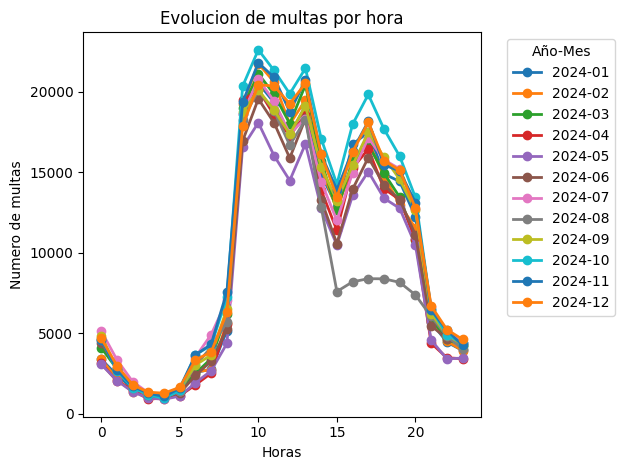

In [32]:
# El metodo fines_hour() crea un grafico con la distribucion de multas por hora, incluyendo mes y anio
multas.fines_hour('multas_hora.png')

In [33]:
calificacion = multas.fines_calification()
display(calificacion)

,CALIFICACION,GRAVE,LEVE,MUY GRAVE
MES,ANIO,,,
1,2024,128932,104160,789
2,2024,130169,103088,812
3,2024,139016,97542,991
4,2024,112994,105873,1033
5,2024,99857,99469,969
6,2024,117362,100912,798
7,2024,154231,87737,682
8,2024,135258,57513,722
9,2024,145634,94332,759


In [34]:
recaudacion =multas.total_payment()
display(recaudacion)

,MES,ANIO,rec_maxima,rec_minima
0,1,2024,30457320.0,15228660.0
1,2,2024,30251870.0,15125935.0
2,3,2024,31381380.0,15690690.0
3,4,2024,27134320.0,13567160.0
4,5,2024,24048550.0,12024275.0
5,6,2024,27647110.0,13823555.0
6,7,2024,33762410.0,16881205.0
7,8,2024,28284090.0,14142045.0
8,9,2024,33704760.0,16852380.0
9,10,2024,37743940.0,18871970.0


In [35]:
cache_dir_path2 = multas._MadridFines__cacheurl.cache_dir

In [36]:
show_files(cache_dir_path2)

['02f003ea0b169b788b726eae71b40b3a',
 '85e9787553447854014af74992ffb57b',
 '63a4681524a5e8e6e594c93fbed10412',
 '69afee907846058fa23251625b3ad823',
 '5925ac5ed82a91ce09d8145ff3c2b3c0',
 '62976f79b26c901193888f4c41959102',
 '5c2e1fb53f417903f9144e14f9f8a49c',
 '431f36b71c4fd05a8f454ac226736d08',
 '6e2a7646c413729579494c674738bde5',
 'de1c1994b75c3140a45ff3b57c80acd9',
 '93a943f551ee518b80e7fd9d4aae921f',
 '052d0cb7026b072dded23be9b31c9905']

In [37]:
# Si deseo eliminar todos los archivos generados puedo llamar al metodo __clean()
multas._MadridFines__cacheurl.clear()

In [38]:
show_files(cache_dir_path2)

[]

## Casos de Prueba para MadridFines

In [39]:
# Ingresar un anio fuera del rango contenido en la pagina
try:
    multas.add(year=1999)
except MadridError as e:
    print(e)

Anio fuera de rango: 1999


In [40]:
# Ingresar un anio del futuro
try:
    multas.add(year=2030)
except MadridError as e:
    print(e)

Anio fuera de rango: 2030


In [41]:
# Ingresar un mes invalido
try:
    multas.add(year= 2024, month=14)
except MadridError as e:
    print(e)

Mes invalido: 14


In [42]:
# Otro mes invalido
try:
    multas.add(year=2023, month=0)
except MadridError as e:
    print(e)

Mes invalido: 0


<Figure size 1000x600 with 0 Axes>

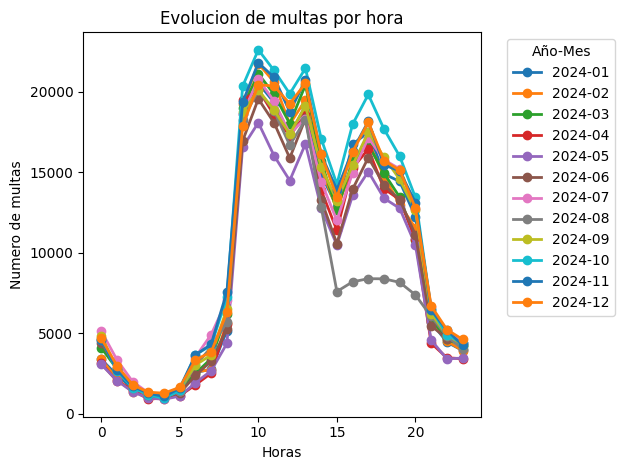

In [43]:
# No hay datos para generar grafico, ejecutar solo en caso de no cargar datos
try:
    multas.fines_hour('test.png')
except MadridError as e:
    print(e)